# Multimédia TP1 - Compressão de Imagem

David Leitão \[2019223148\]

Rodrigo Machado \[2019218299\]

Rui Costa \[2019224237\]

In [1]:
# Notebook setup
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from report import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = [5, 5]

barn = np.array(Image.open("imagens/barn_mountains.bmp"))
peppers = np.array(Image.open("imagens/peppers.bmp"))
logo = np.array(Image.open("imagens/logo.bmp"))

# 1. Compressão JPEG usando GIMP

## 1.1. barn_mountains.bmp

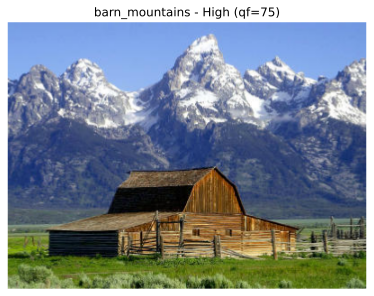

In [2]:
path = "ex1/barn_mountains"
tmp = np.array(Image.open(f"{path}/high.jpg"))
plt.title("barn_mountains - High (qf=75)")
viewImage(tmp)

Quando vista sem qualquer nível de ampliação, não existem grandes alterações visíveis. No entanto, podemos observar alguns artefactos nos contornos das figuras nas imagens.

---

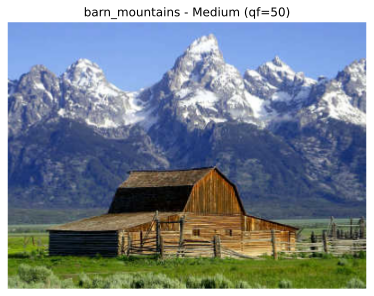

In [3]:
tmp = np.array(Image.open(f"{path}/medium.jpg"))
plt.title("barn_mountains - Medium (qf=50)")
viewImage(tmp)

Já são observáveis vários artefactos, maioritariamente nos contornos. Podemos observar também nas sombras do celeiro e na base da montanha. Com alguma ampliação, podemos observar a divisão em píxeis.

---

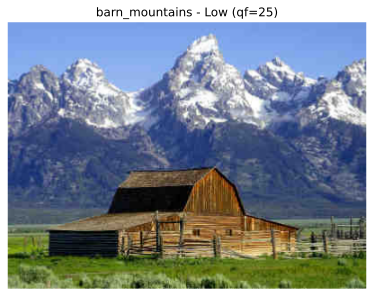

In [4]:
tmp = np.array(Image.open(f"{path}/low.jpg"))
plt.title("barn_mountains - Low (qf=25)")
viewImage(tmp)

 Observam-se artefactos por toda a imagem. Podemos ver também no céu uma divisão clara em píxeis, que se torna ainda mais visível quanto mais se amplie a imagem.

## 1.2. peppers.bmp

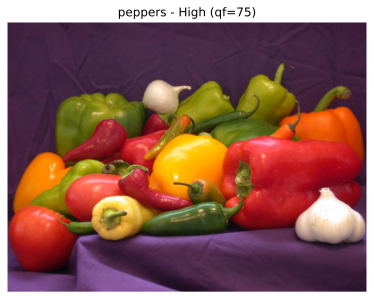

In [5]:
path = "ex1/peppers"
tmp = np.array(Image.open(f"{path}/high.jpg"))
plt.title("peppers - High (qf=75)")
viewImage(tmp)

A imagem apresenta uma espécie de efeito granular e um brilho menos intenso. Podemos observar com bastante ampliação alguns artefactos nas cortinas.

---

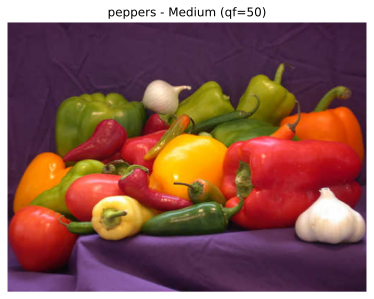

In [6]:
tmp = np.array(Image.open(f"{path}/medium.jpg"))
plt.title("peppers - Medium (qf=50)")
viewImage(tmp)

Já podemos observar na cortina uma maior quantidade de artefactos, tal como nos contornos das várias figuras. À semelhança da primeira imagem, com alguma ampliação já podemos observar uma divisão em píxeis nas cortinas.

---

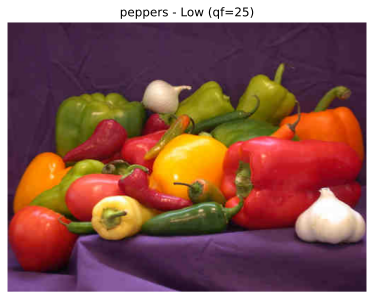

In [7]:
tmp = np.array(Image.open(f"{path}/low.jpg"))
plt.title("peppers - Low (qf=25)")
viewImage(tmp)

A imagem inteira apresenta artefactos visíveis por toda a imagem, especialmente por toda a cortina. A divisão em píxeis torna-se bastante evidente nos objetos vermelhos e nas zonas com reflexos de luz.

## 1.3. logo.bmp

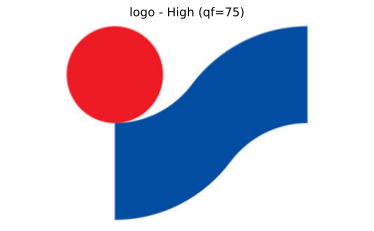

In [8]:
path = "ex1/logo"
tmp = np.array(Image.open(f"{path}/high.jpg"))
plt.title("logo - High (qf=75)")
viewImage(tmp)

A imagem inteira apresenta artefactos visíveis por toda a imagem, especialmente por toda a cortina. A divisão em píxeis torna-se bastante evidente nos objetos vermelhos e nas zonas com reflexos de luz.

---

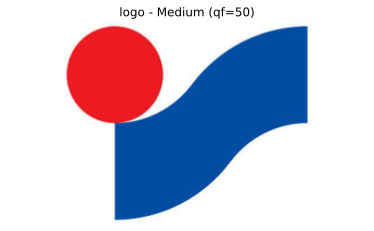

In [9]:
tmp = np.array(Image.open(f"{path}/medium.jpg"))
plt.title("logo - Medium (qf=50)")
viewImage(tmp)

Na parte vermelha do logo podemos observar artefactos na circunferência sem qualquer ampliação, tal como no fundo branco junto dos contornos. Aplicando alguma ampliação já conseguimos
ver o mesmo no contorno da parte azul e podemos verificar também divisões em píxeis nas zonas de mudança de cor.

---

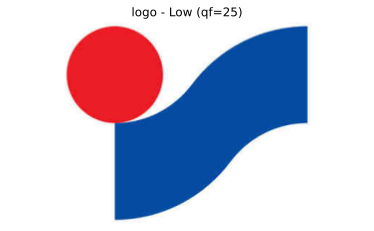

In [10]:
tmp = np.array(Image.open(f"{path}/low.jpg"))
plt.title("logo - Low (qf=25)")
viewImage(tmp)

Observam-se artefactos na parte colorida e no fundo branco, continuando a ser mais visível nos contornos do que no preenchimento. A pixelização nas zonas de mudança de cor torna se ainda mais
percetível com uma menor ampliação do que na qualidade média. Podemos ainda observar alguma pixelização na zona de preênchimento da parte vermelha.

# 2. Comparação de Y com RGB, e com Cb e Cr

In [11]:
# Matplotlib figure sizing
plt.rcParams['figure.figsize'] = [9, 9]

O modelo RBG é um modelo de cor que, com o conhecimento limitado na altura da sua conceção, tenta simular os cones presentes no olho humano, representando as imagens com 3 canais: Vermelho, Verde, e Vermelho.

No entanto, como todos os canais contêm informação de luminância e cor, o modelo RGB apresenta uma elevada redundância no sinal.

O modelo de cor YCbCr extrai a luminância dos 3 canais de RGB para um único canal, $Y$, e toma em conta a sensibilidade do olho humano ao fazê-lo. Como o olho é mais sensível ao verde e vermelho, esta componente usa menos informação do canal azul.
$$Y = 0.3R + 0.6G + 0.1B$$

O canal $Y$ é uma representação acromática da imagem original. Este canal não é comprimido pelo codec de JPEG, pois o olho humano é sensível à informação contida na porção acromática da imagem, como se pode verificar [aqui](https://upload.wikimedia.org/wikipedia/commons/d/d9/Barns_grand_tetons_YCbCr_separation.jpg).

Os restantes canais, $Cb$ e $Cr$, são canais de crominância, que representam as diferenças dos canais azul e vermelho da luminância, respetivamente. Como o olho humano é menos sensível a estas componentes, podemos reduzir o número de amostras - *downsampling* - sem alterar a perceção da imagem reconstruída de forma significativa.

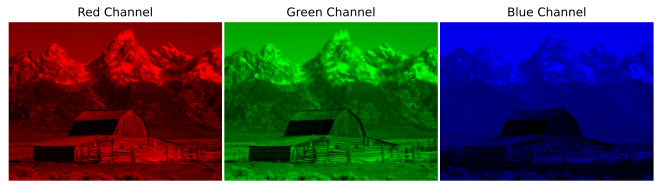

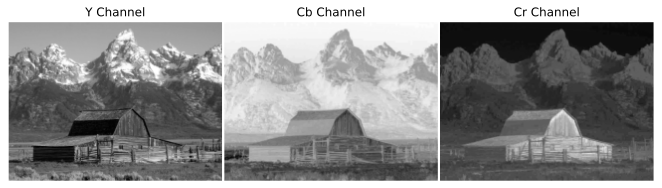

In [12]:
colormodels(barn)

# 3. Downsampling e os seus efeitos sobre a imagem

Como apresentado acima, os canais de crominância podem ser *resampled* com menor detalhe, pois a uma distância de visualização normal, não existem perdas percetíveis de qualidade.

O codec JPEG permite rácios típicos de *subsampling* de **4:4:4** (sem subsampling), **4:2:2** , e **4:2:0**.
O rácio **4:2:2** reduz a resolução horizontal em ambos os canais Cb e Cr para metade, enquanto que o rácio **4:2:0** reduz a resolução horizontal e vertical para metade.
Intuitivamente, podemos concluir que **4:2:0** resulta numa maior taxa de compressão ao custo de uma maior destrutividade, relativamente ao rácio **4:2:2**.

De facto, as taxas de compressões relativas ao rácio **4:4:4** são:

- **4:2:2**: $\frac{4+4+4}{4+2+2} = 12\text{:}8 = 3\text{:}2$ 
- **4:2:0**: $\frac{4+4+4}{4+2+0} = 12\text{:}6 = 2\text{:}1$ 

# 4. Transformada de Cosseno Discreta (DCT)

## 4.1. DCT em canais inteiros

As transformadas dos canais inteiros apresentam coeficientes AC não negligenciáveis, isto porque existem transições inevitáveis quando o escopo da transformada abrange o canal inteiro. A compressão da DCT iria levar a perdas significativas da imagem original. Podemos restringir o escopo das transformadas para blocos mais pequenos, de modo a captar zonas da imagem mais suaves, nas quais os coeficientes AC sejam diminutos, e por conseguinte, mais dispensáveis.

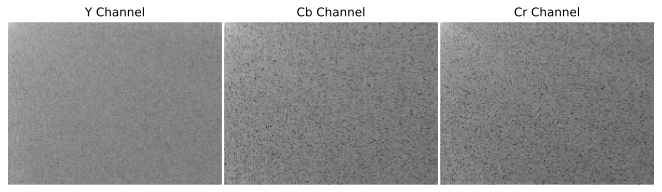

In [13]:
DCT(barn, ratio=(4,2,0))

## 4.2. DCT em blocos 8x8

Ao aplicar a transformada em blocos de 8x8, a probabilidade de apanhar transições abruptas de píxeis é reduzida drasticamente, pelo que o potencial de compressão da imagem aumenta.
Isto porque, numa imagem suave, a DCT apresenta maior energia nas frequências baixas, o que faz com que a maioria da informação esteja contida num número reduzido de píxeis.

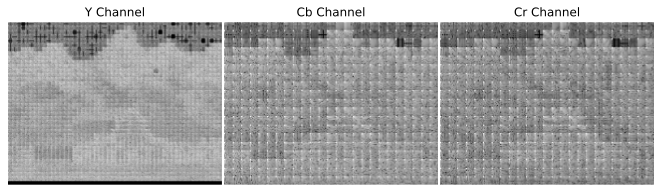

In [14]:
DCT(barn, ratio=(4,2,0), block=8)

## 4.3. DCT em blocos 64x64

Aplicando a DCT em blocos de 64x64 consegue-se um melhor resultado do que num canal inteiro, mas resultaria num pior potencial de compressão do que blocos de 8x8 pois a probabilidade da existência de transições menos suaves em cada bloco aumenta, o que levaria a um maior número de frequências elevadas não negligenciáveis na recuperação da imagem original com relativa qualidade.

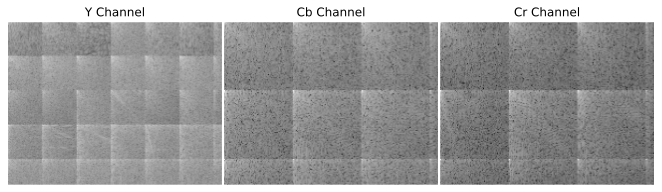

In [15]:
DCT(barn, ratio=(4,2,0), block=64)

# 5. Quantização

A quantização afeta desproporcionalmente os coeficientes DC e AC de cada bloco da DCT, pois o canto superior esquerdo de cada bloco contém a informação mais importante para a reconstrução de uma imagem com detalhe e qualidade relativa - o coeficiente DC e os primeiros coeficientes AC. A esta discriminação dá-se o nome de **quantização adaptativa**.

A quantização consiste na divisão dos blocos da DCT por uma matriz, seguida de um arredondamento que inevitavelmente leva a destruição de dados de forma irrecuperável.

À medida que se reduz o fator de qualidade, os coeficientes resultantes ficam cada vez menores, como resultado do aumento dos valores da matriz de quantização. Isto leva a uma maior destrutividade de dados, e por conseguinte, perda de qualidade, que por outro lado, leva uma maior taxa de compressão final.

A imagem fica com áreas crescentes de coeficientes baixos, visível nas imagens abaixo pelas áreas negras cada vez maiores, que permite a representação destas com um número decrescente de bits.

Comparando com os resultados da DCT, e como consequência do referido acima, a quantização introduz um correlacionamento entre coeficientes adjacentes, o qual é potenciado posteriormente pela codificação diferencial, ainda apresentada neste trabalho, e por métodos de compressão como Huffman ou RLE, os quais estão fora do escopo deste projeto. 

***Fator de qualidade: 100***

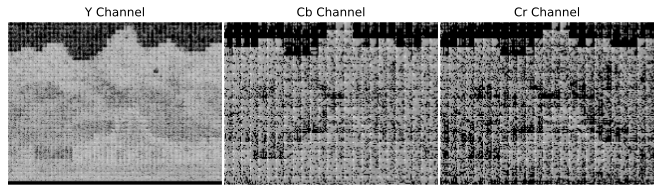

In [16]:
quantization(barn, qf=100)

**Fator de qualidade: 75**

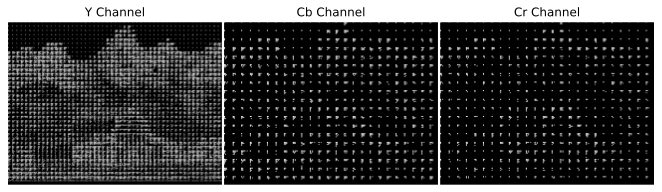

In [17]:
quantization(barn, qf=75)

**Fator de qualidade: 50**

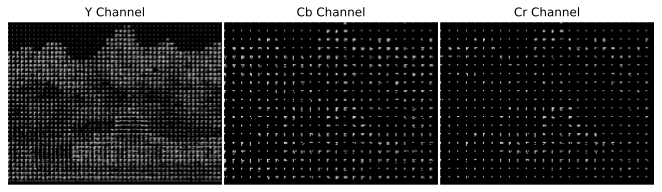

In [18]:
quantization(barn, qf=50)

**Fator de qualidade: 25**

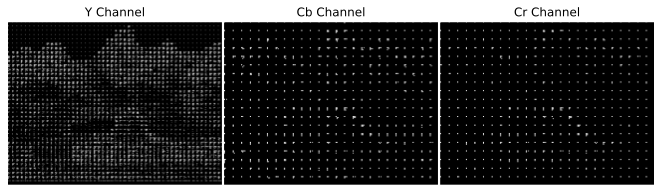

In [19]:
quantization(barn, qf=25)

**Fator de qualidade: 10**

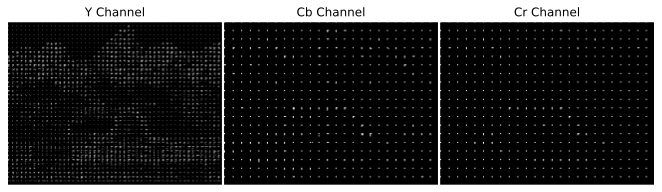

In [20]:
quantization(barn, qf=10)

# 6. Codificação DPCM

A codificação DPCM aplicada é uma codificação diferencial básica sobre os coeficientes DC da DCT, em que o coeficiente $c_i$ é codificado como a diferença entre este e o anterior: $d_i = c_i - c_{i-1}$.

Em imagens com transições suaves, estes valores são semelhantes - existe uma correlação elevada entre coeficientes adjacentes - pelo que as diferenças serão pequenas. Esta propriedade permite um estreitamento da gama de valores e uma menor variância destes, o que abre as portas para métodos de compressão entrópica.

Abaixo apresentamos a imagem antes e depois da codficação DPCM. É possível observer zonas do céu que ficam praticamente a negro, especialmente nos canais Cb e CR, e uma redução notável, ainda que menor, do valor de alguns coeficientes no centro dos canais.

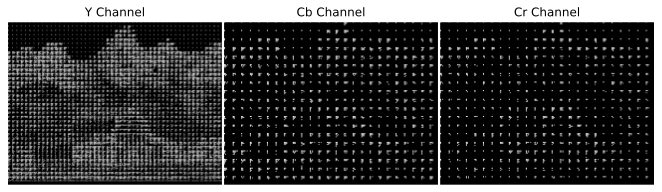

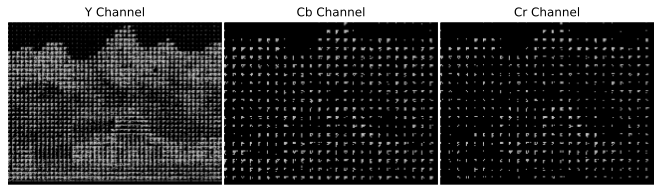

In [21]:
DPCM(barn, ratio=(4,2,0), qf=75)

# 7. Codificação e descodificação end-to-end

Comportamento geral, os valores do Mean Square Error (MSE) aumentam com o decréscimo em qualidade de compressão, os valores da Root Mean Square Error (RMSE) e do Singnal-to-Noise Ratio (SNR) aproximam-se um do outro, e o valor do Peak Noise-to-Signal Ratio (PNSR) diminui.

Quanto menor a qualidade, melhor se observam os contornos claros das imagens. No caso da imagem barn_mountains.bmp, podemos observar também o aparecimento de divisões de píxeis pretos e brancos formando linhas.

## 7.1. barn_mountains.bmp

MSE: 20.550
RMSE: 4.533
SNR: 34.058 dB
PSNR: 35.003 dB


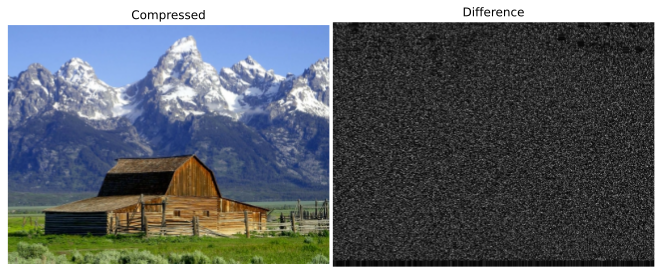

In [22]:
verboseMetrics(barn, qf=100, ratio=(4,2,0))

MSE: 171.586
RMSE: 13.099
SNR: 24.841 dB
PSNR: 25.786 dB


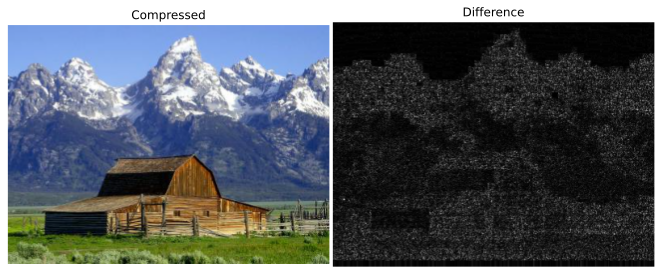

In [23]:
verboseMetrics(barn, qf=75, ratio=(4,2,0))

MSE: 282.302
RMSE: 16.802
SNR: 22.679 dB
PSNR: 23.624 dB


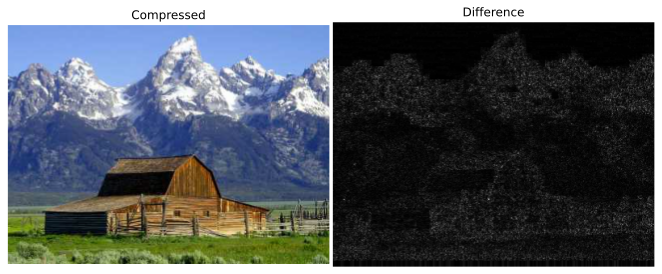

In [24]:
verboseMetrics(barn, qf=50, ratio=(4,2,0))

MSE: 422.080
RMSE: 20.545
SNR: 20.932 dB
PSNR: 21.877 dB


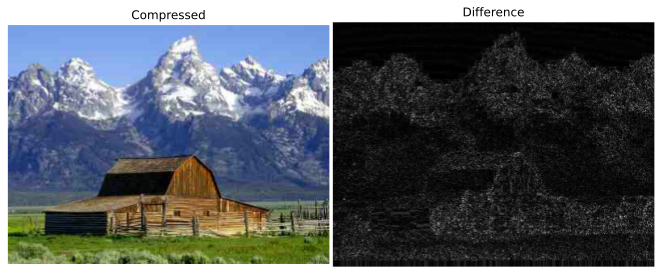

In [25]:
verboseMetrics(barn, qf=25, ratio=(4,2,0))

MSE: 740.352
RMSE: 27.209
SNR: 18.492 dB
PSNR: 19.436 dB


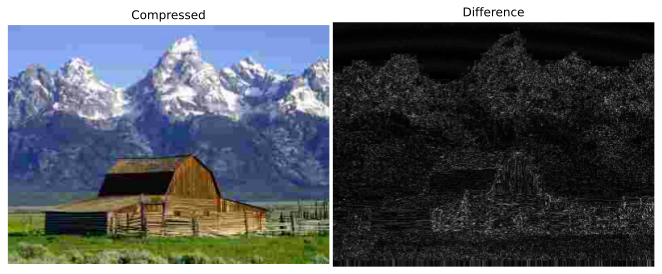

In [26]:
verboseMetrics(barn, qf=10, ratio=(4,2,0))

## 7.2. peppers.bmp

Quanto ao Peppers, quanto maior o ruído, melhor se observa o relevo da cortina no fundo. No entanto, no caso de qualidade 10, o ruído torna difícil a observação dos contornos dos objetos, sendo observável no topo de todos os objetos. 
Para o caso da imagem logo, o aparecimento de ruído corresponde exatamente aos contornos das imagens, dado que é onde nas versão comprimida se apresentam artefactos.
Com o decrescer de qualidade, o contorno torna-se cada ver melhor definído.

MSE: 12.649
RMSE: 3.557
SNR: 33.905 dB
PSNR: 37.110 dB


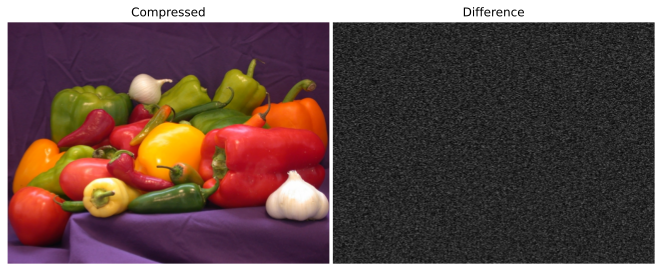

In [27]:
verboseMetrics(peppers, qf=100, ratio=(4,2,0))

MSE: 70.840
RMSE: 8.417
SNR: 26.423 dB
PSNR: 29.628 dB


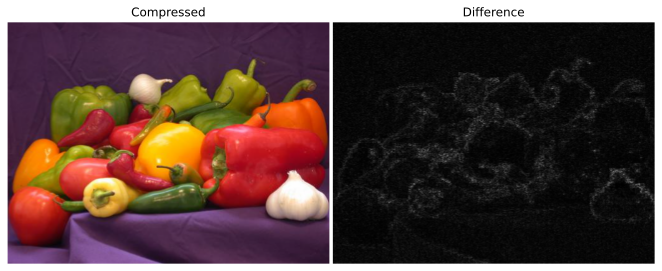

In [28]:
verboseMetrics(peppers, qf=75, ratio=(4,2,0))

MSE: 106.063
RMSE: 10.299
SNR: 24.670 dB
PSNR: 27.875 dB


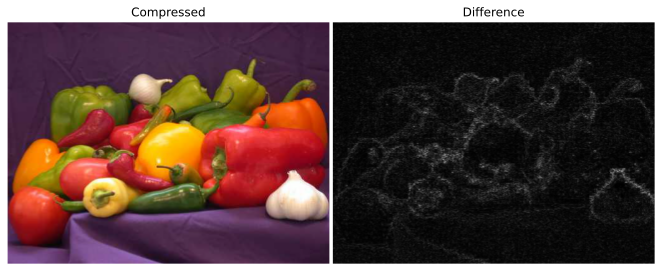

In [29]:
verboseMetrics(peppers, qf=50, ratio=(4,2,0))

MSE: 162.495
RMSE: 12.747
SNR: 22.818 dB
PSNR: 26.022 dB


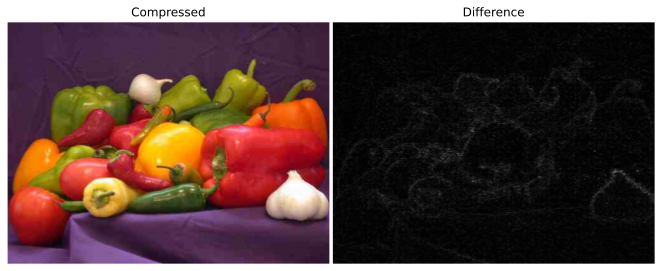

In [30]:
verboseMetrics(peppers, qf=25, ratio=(4,2,0))

MSE: 341.954
RMSE: 18.492
SNR: 19.586 dB
PSNR: 22.791 dB


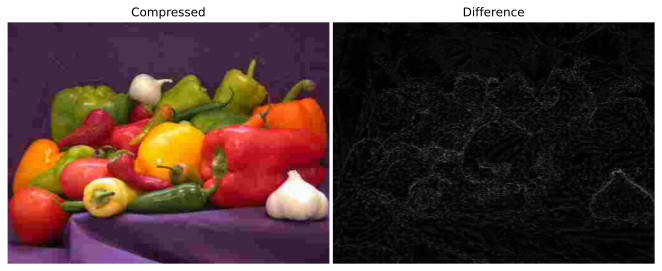

In [31]:
verboseMetrics(peppers, qf=10, ratio=(4,2,0))

## 7.3. logo.bmp

MSE: 9.283
RMSE: 3.047
SNR: 41.655 dB
PSNR: 38.454 dB


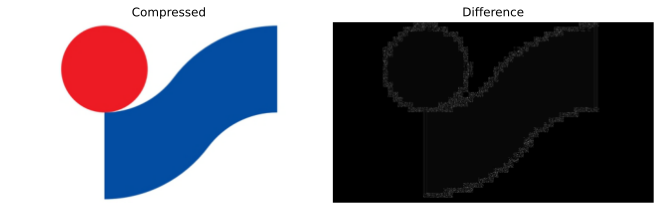

In [32]:
verboseMetrics(logo, qf=100, ratio=(4,2,0))

MSE: 33.079
RMSE: 5.751
SNR: 36.137 dB
PSNR: 32.935 dB


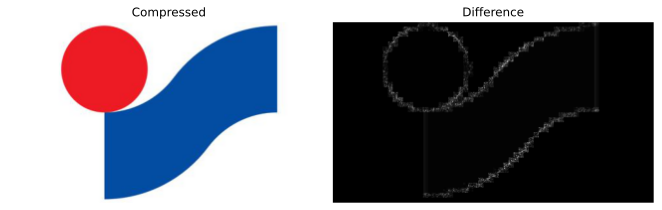

In [33]:
verboseMetrics(logo, qf=75, ratio=(4,2,0))

MSE: 55.404
RMSE: 7.443
SNR: 33.897 dB
PSNR: 30.695 dB


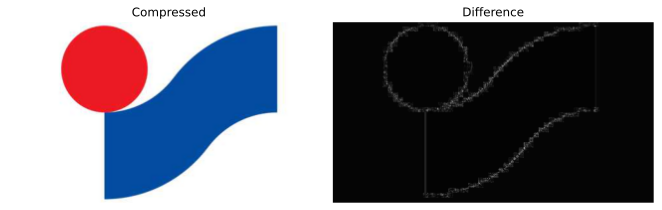

In [34]:
verboseMetrics(logo, qf=50, ratio=(4,2,0))

MSE: 84.155
RMSE: 9.174
SNR: 32.081 dB
PSNR: 28.880 dB


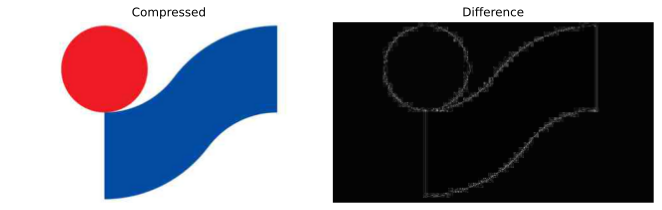

In [35]:
verboseMetrics(logo, qf=25, ratio=(4,2,0))

MSE: 182.662
RMSE: 13.515
SNR: 28.716 dB
PSNR: 25.514 dB


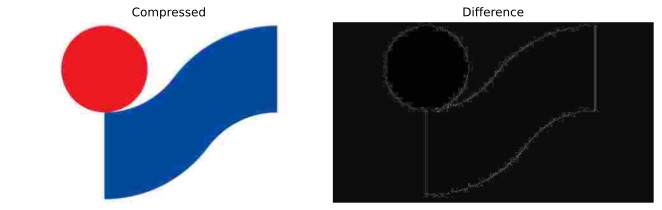

In [36]:
verboseMetrics(logo, qf=10, ratio=(4,2,0))